In [1]:
import sys
import os
 
import pandas as pd
import numpy as np
 
# # Remote Data Access
# import pandas_datareader.data as web
# import datetime
# # reference: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
 
# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

In [2]:
data = pd.read_csv("data.csv", index_col=0, parse_dates=[0])
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
print(data.head(10))

             Value  USD (PM)  tradable
Date                                  
2016-09-11  621.65       NaN         0
2016-09-12  609.67   1324.60         1
2016-09-13  610.92   1323.65         1
2016-09-14  608.82   1321.75         1
2016-09-15  610.38   1310.80         1
2016-09-16  609.11   1308.35         1
2016-09-17  607.04   1308.35         0
2016-09-18  611.58   1308.35         0
2016-09-19  610.19   1314.85         1
2016-09-20  608.66   1313.80         1


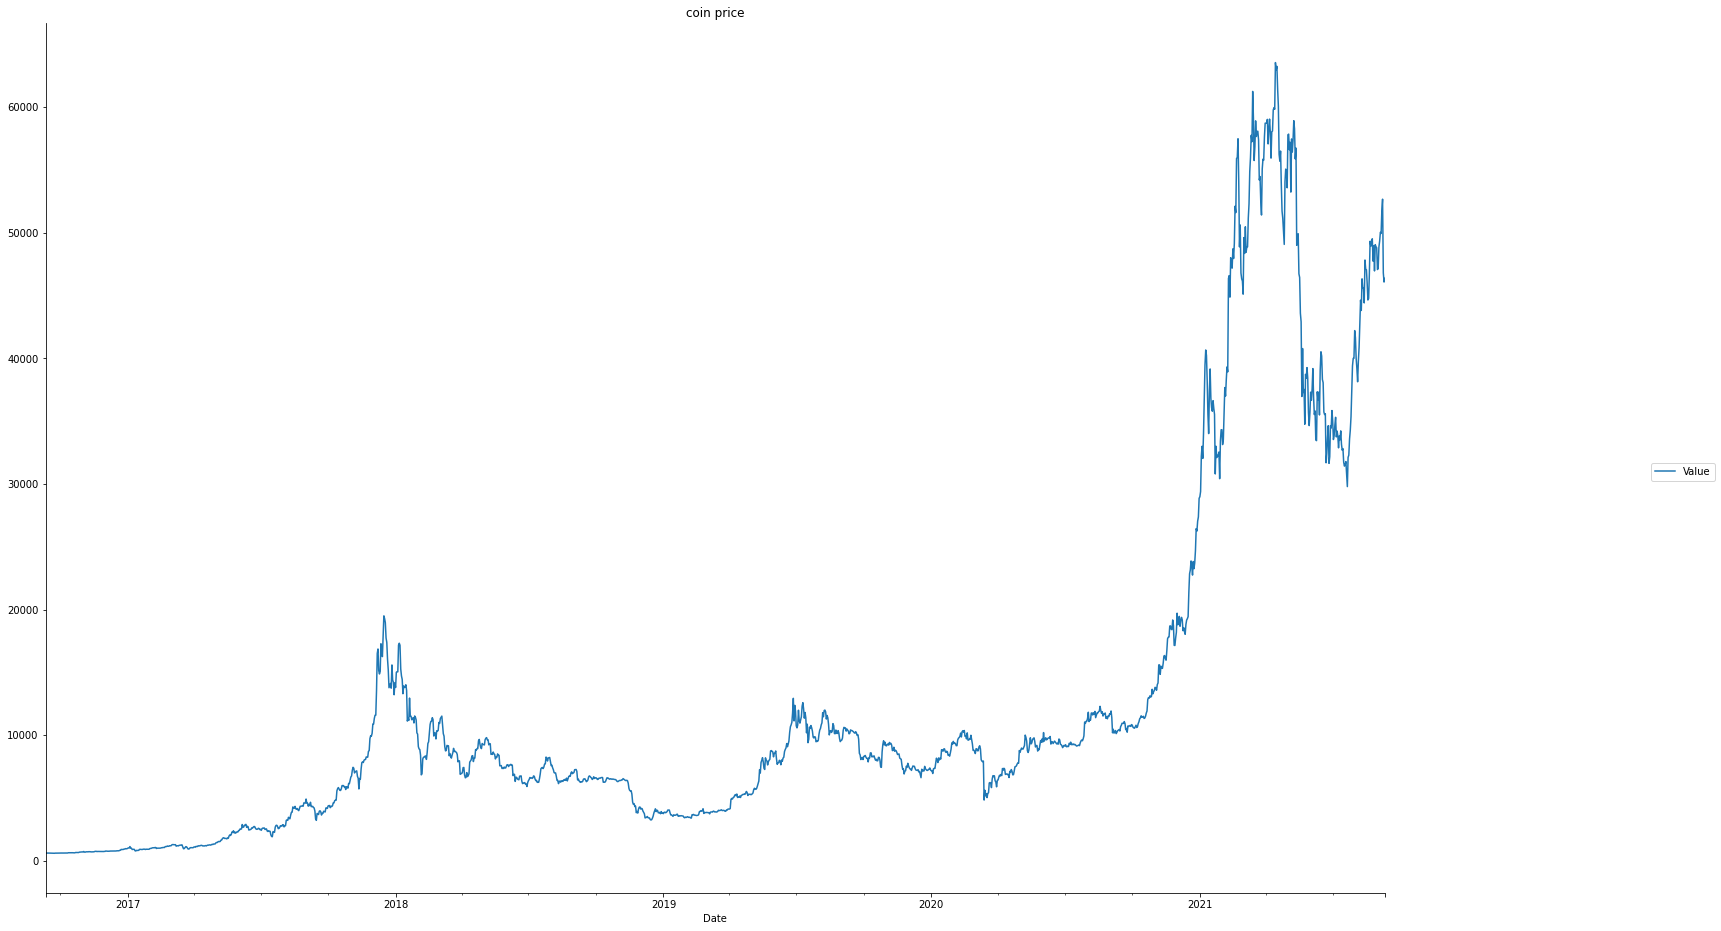

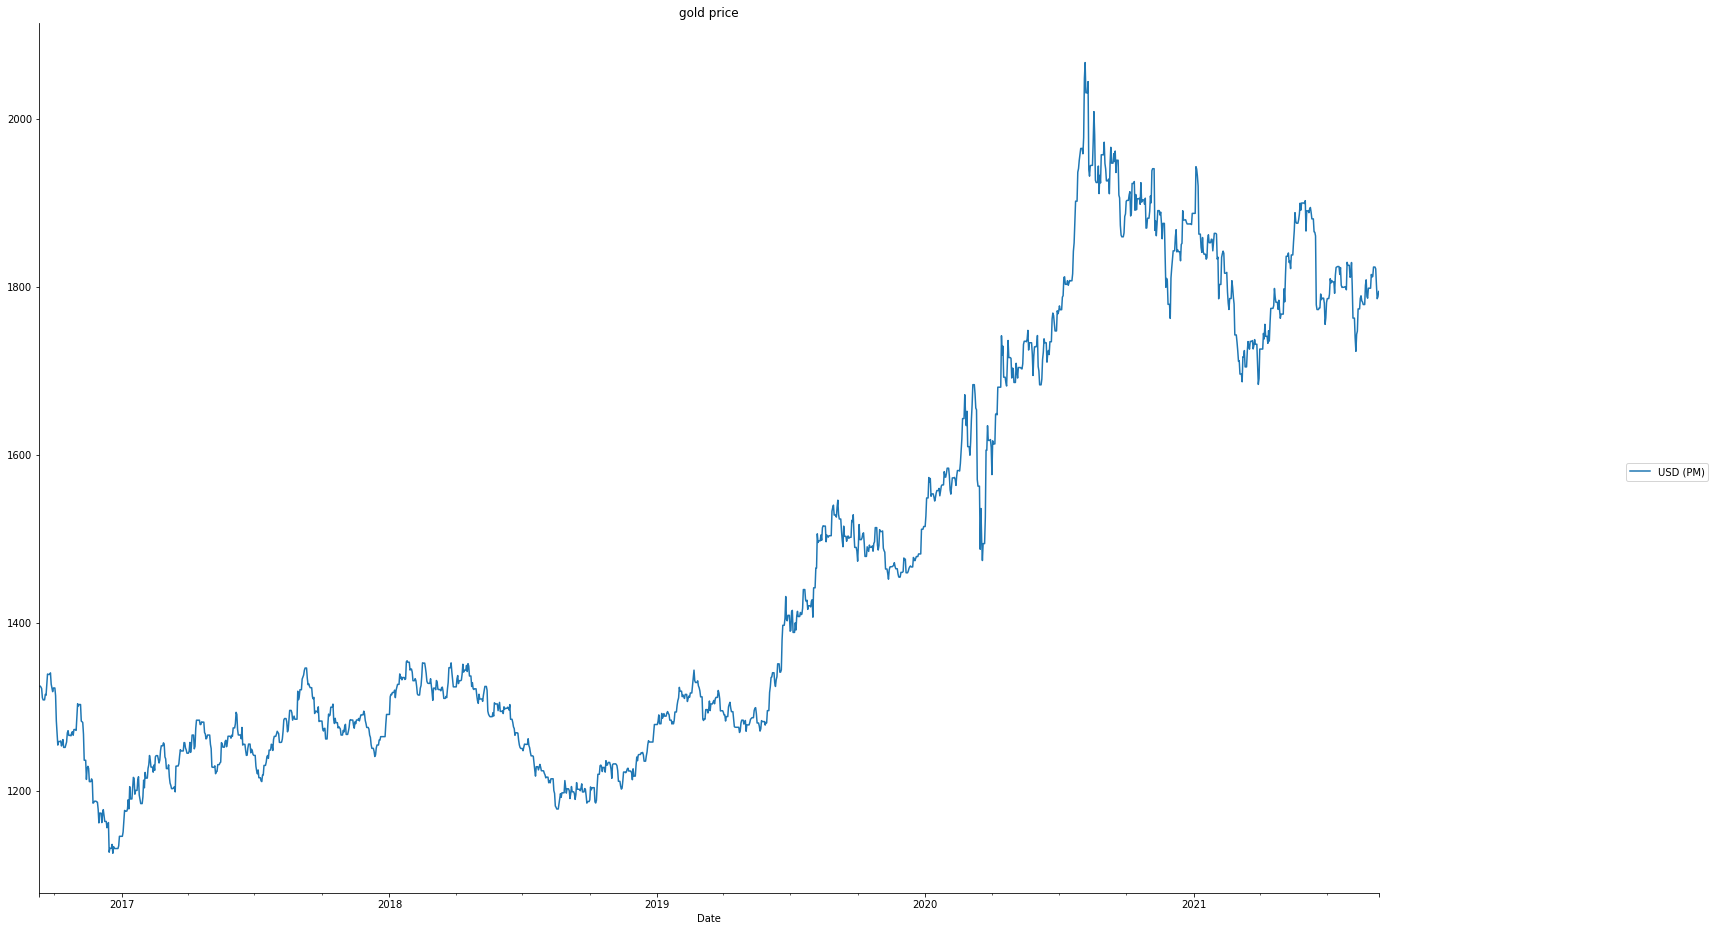

In [3]:
# 绘制图像
import matplotlib.pyplot as plt
import itertools
import numpy as np
import seaborn as sns

data_week = data.resample('M').mean()
coin = data[["Value"]]
coin.plot(figsize=(24,16))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("coin price")
sns.despine()
gold = data[["USD (PM)"]]
gold.plot(figsize=(24,16))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("gold price")
sns.despine()

/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

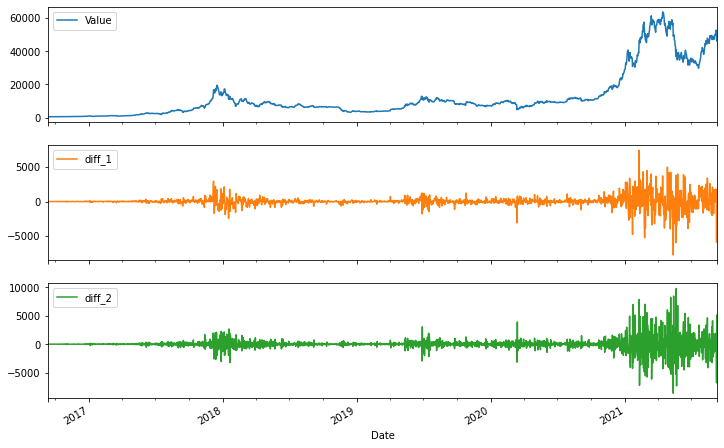

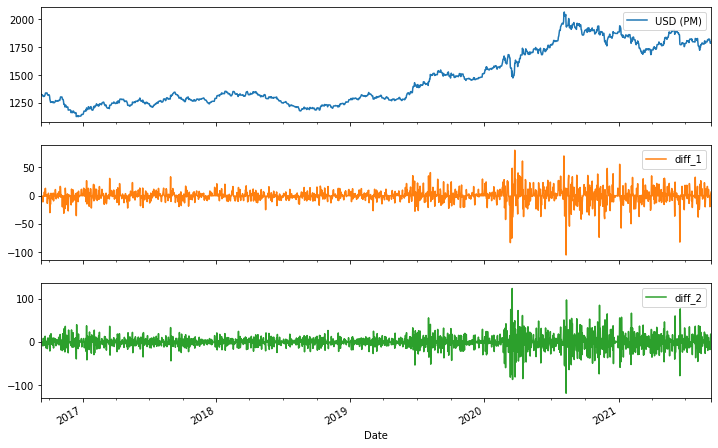

In [4]:
# 差分处理
coin['diff_1'] = coin["Value"].diff(1)
coin['diff_2'] = coin['diff_1'].diff(1)
coin.plot(subplots=True, figsize=(12, 8))
gold['diff_1'] = gold["USD (PM)"].diff(1)
gold['diff_2'] = gold['diff_1'].diff(1)
gold.plot(subplots=True, figsize=(12, 8))

In [5]:
# 单位根检验，确定数据为平稳时间序列
from statsmodels.tsa.stattools import adfuller
print(adfuller(coin["diff_1"].dropna()))
print(adfuller(gold["diff_1"].dropna()))
# 从结果可以看出拒绝原假设（原假设为是非平稳时间序列），故数据为平稳时间序列

(-8.535405377369173, 1.0111831893571009e-13, 23, 1801, {'1%': -3.4339861159726306, '5%': -2.863146142843122, '10%': -2.5676250581282964}, 29151.81649615494)
(-15.300357507041305, 4.321142402131146e-28, 8, 1815, {'1%': -3.4339580289794225, '5%': -2.8631337437669275, '10%': -2.567618456010139}, 13883.67157055081)


/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, 

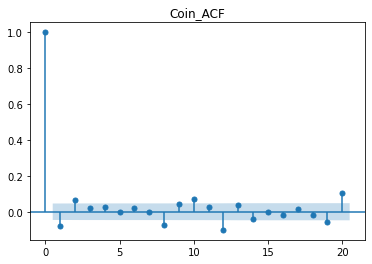

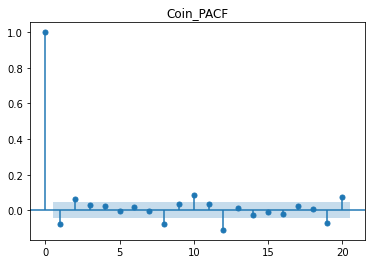

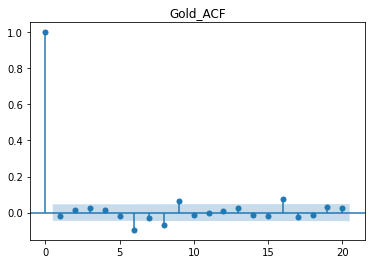

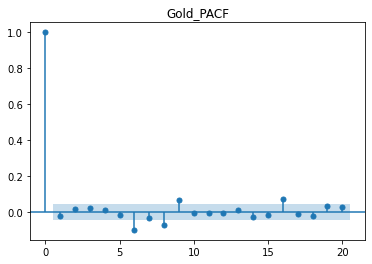

In [6]:
acf = sm.graphics.tsa.plot_acf(coin["diff_1"].dropna(), lags=20)
plt.title("Coin_ACF")
acf.show()
pacf = sm.graphics.tsa.plot_pacf(coin["diff_1"].dropna(), lags=20)
plt.title("Coin_PACF")
pacf.show()
acf = sm.graphics.tsa.plot_acf(gold["diff_1"].dropna(), lags=20)
plt.title("Gold_ACF")
acf.show()
pacf = sm.graphics.tsa.plot_pacf(gold["diff_1"].dropna(), lags=20)
plt.title("Gold_PACF")
pacf.show()

/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/statespace/sa

/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning

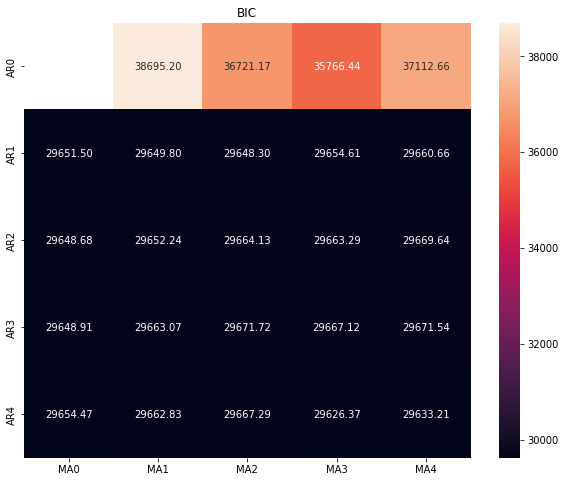

In [7]:
import itertools
from statsmodels.tools.sm_exceptions import ValueWarning
import warnings
warnings.filterwarnings('ignore','ValueWarning')
#当多组值都不符合时，遍历多组值，得出最好的值
p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4
 
# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
     
    try:
        model = sm.tsa.SARIMAX(coin["Value"], order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');

/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels

<Figure size 864x576 with 0 Axes>

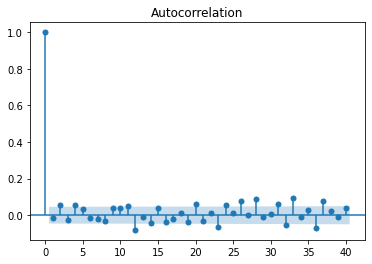

2016-09-12      646.716420
2016-09-13      636.953375
2016-09-14      637.241107
2016-09-15      633.323135
2016-09-16      636.373543
                  ...     
2021-09-06    49982.983856
2021-09-07    51807.755671
2021-09-08    52670.364314
2021-09-09    47154.105316
2021-09-10    45935.845864
Freq: D, Length: 1825, dtype: float64


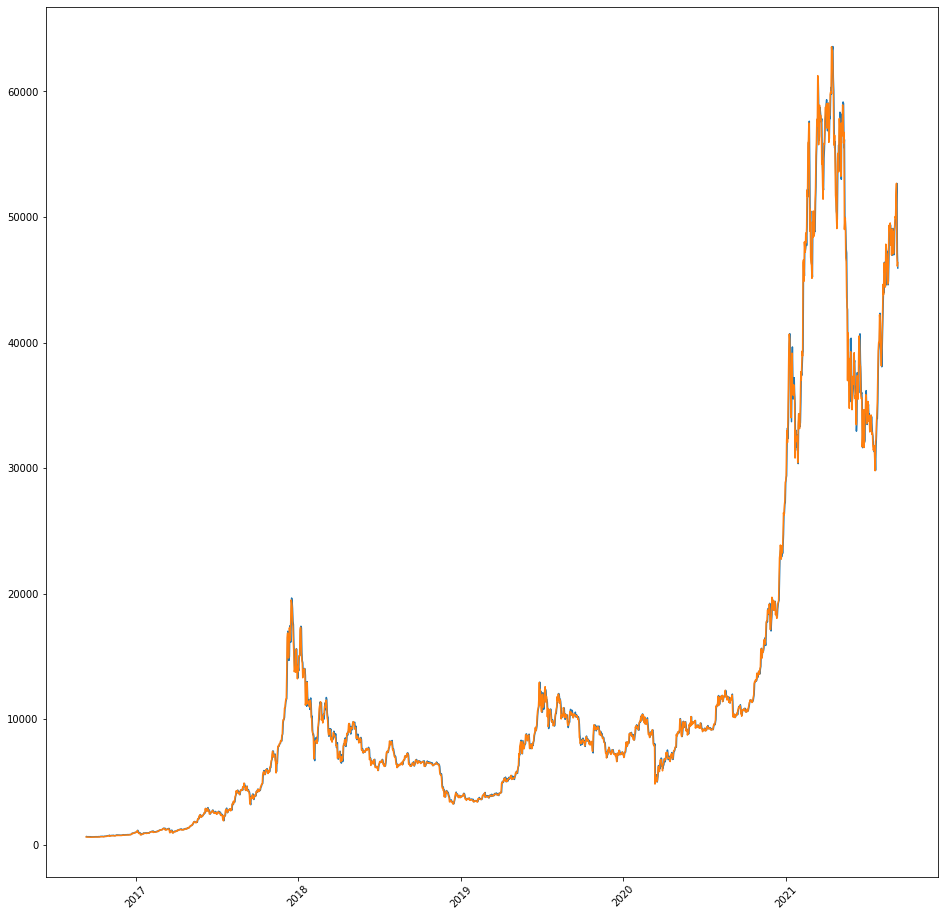

In [8]:
# order pdq
model = sm.tsa.ARIMA(coin["Value"], order=(2, 1, 2),freq='D')
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.show()
predict_sunspots = results.predict(start=str('2016-09-12'),dynamic=False, typ='levels')
print(predict_sunspots)
plt.figure(figsize=(16, 16))
plt.xticks(rotation=45)
plt.plot(predict_sunspots)
plt.plot(coin["Value"])#[<matplotlib.lines.Line2D at 0x28025665278>]

/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_mode

/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning

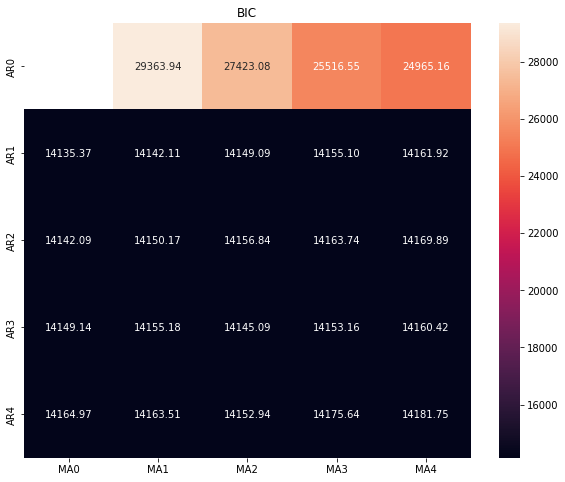

In [9]:
import itertools
#当多组值都不符合时，遍历多组值，得出最好的值
p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4
 
# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
     
    try:
        model = sm.tsa.SARIMAX(gold["USD (PM)"].fillna(method='bfill'), order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');

/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<Figure size 864x576 with 0 Axes>

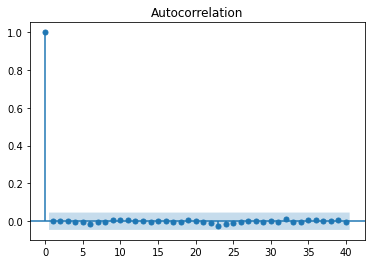

2016-09-12    1324.596347
2016-09-13    1324.600000
2016-09-14    1323.669714
2016-09-15    1321.789427
2016-09-16    1311.027226
                 ...     
2021-09-06    1823.700000
2021-09-07    1821.643578
2021-09-08    1802.553611
2021-09-09    1786.335132
2021-09-10    1788.203310
Freq: D, Name: predicted_mean, Length: 1825, dtype: float64


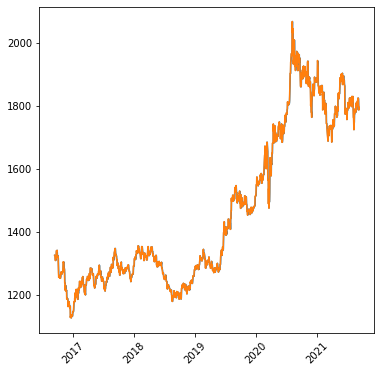

In [10]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(gold["USD (PM)"].fillna(method='bfill'), order=(1, 1, 0),freq='D')
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.show()
predict_sunspots_gold = results.predict(start=str('2016-09-12'),dynamic=False, typ='levels')
print(predict_sunspots_gold)
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(predict_sunspots_gold)
plt.plot(gold["USD (PM)"])#[<matplotlib.lines.Line2D at 0x28025665278>]

In [11]:
predict_sunspots_coin=predict_sunspots
print(predict_sunspots_coin)
print(coin["Value"])
print(predict_sunspots_gold)
print(gold["USD (PM)"])

2016-09-12      646.716420
2016-09-13      636.953375
2016-09-14      637.241107
2016-09-15      633.323135
2016-09-16      636.373543
                  ...     
2021-09-06    49982.983856
2021-09-07    51807.755671
2021-09-08    52670.364314
2021-09-09    47154.105316
2021-09-10    45935.845864
Freq: D, Length: 1825, dtype: float64
Date
2016-09-11      621.65
2016-09-12      609.67
2016-09-13      610.92
2016-09-14      608.82
2016-09-15      610.38
                ...   
2021-09-06    51769.06
2021-09-07    52677.40
2021-09-08    46809.17
2021-09-09    46078.38
2021-09-10    46368.69
Name: Value, Length: 1826, dtype: float64
2016-09-12    1324.596347
2016-09-13    1324.600000
2016-09-14    1323.669714
2016-09-15    1321.789427
2016-09-16    1311.027226
                 ...     
2021-09-06    1823.700000
2021-09-07    1821.643578
2021-09-08    1802.553611
2021-09-09    1786.335132
2021-09-10    1788.203310
Freq: D, Name: predicted_mean, Length: 1825, dtype: float64
Date
2016-09-11    

In [12]:
import math
time = pd.date_range(start='2016-09-11', end='2021-09-10')
tradable_time = pd.date_range(start='2016-09-11', end='2021-09-10',freq="B")
coin_increase = [2.145571904, 11.69336688, 89.56046243, 669.1824212, 5000]
coin_decrease = [12.11915554, 74.411615, 615.8954844, 5000]
gold_increase = [0.0266, 0.67217, 18.346, 500]
gold_decrease = [0.0023,0.0468,1.0322,22.7, 500]
a = 0.0001
max_price = 5000
C_coin = 500
C_gold = 500
M9_coin = 0.11
M9_gold = 0.021
M1_coin = 0.0854
M1_gold = 0.021
M5_coin = 0.0032
M5_gold = 0.0003
u_coin_increase = len(coin_increase)
u_coin_decrease = len(coin_decrease)
u_gold_increase = len(gold_increase)
u_gold_decrease = len(gold_decrease)
C = 1000
G = 0
B = 0
m_b = 0
n_b = 0
m_gold = 0
n_gold = 0
accumulate_rate_coin = 0
accumulate_rate_gold = 0
for d in range(4, len(time)):
    # predict increment
    # print(predict_sunspots_gold[time[d]])
    increment_rate = (predict_sunspots_coin[time[d]] - coin["Value"][time[d - 1]]) / coin["Value"][time[d - 1]]
    # coin
    if increment_rate < 0:
        n_b += 1
        if m_b > 0:
            accumulate_rate_coin = 0
            m_b = 0
        accumulate_rate_coin -= increment_rate
        x = accumulate_rate_coin / (M1_coin / u_coin_decrease)
        money = 1.111 * math.exp(2.1038 * x)
        if C_coin-(money - B) <= 0:
            continue
        C_coin -= (money - B)
        B = (money - B) / coin["Value"][time[d]]
    elif increment_rate > 0:    # 减仓
        m_b += 1
        if n_b > 0:
            accumulate_rate_coin = 0
            n_b = 0
        accumulate_rate_coin += increment_rate
        x = accumulate_rate_coin / (M9_coin / u_coin_increase)
        money = 0.208 * math.exp(2.0186 * x)
        # B*coin["Value"][time[d]] 当前拥有的比特币价值
        B = B * (1 - money / max_price)
        C_coin += B * (money / max_price) * coin["Value"][time[d]]
    # print("C_coin:{},byte:{},gold:{},money:{},increment_rate:{},x:{},m_b:{},n_b:{}".format(C_coin, B, G, money,increment_rate, x, m_b, n_b))
    if time[d] in tradable_time:
        # gold
        increment_rate_gold = (predict_sunspots_gold[time[d]] - gold["USD (PM)"][time[d - 1]]) / gold["USD (PM)"][time[d - 1]]
        if increment_rate_gold < 0:
            n_gold += 1
            if m_gold > 0:
                accumulate_rate_gold = 0
                m_gold = 0
            accumulate_rate_gold -= increment_rate_gold
            x = accumulate_rate_gold / (M1_gold / u_gold_decrease)
            money = 0.0001 * math.exp(3.0729 * x)
            if C_gold - (money - G) <= 0:
                continue
            C_gold -= (money - G)
            G = (money - G) / gold["USD (PM)"][time[d]]
        elif increment_rate_gold > 0:   # 减仓
            m_gold += 1
            # 不连续了，将积累的清空
            if n_gold > 0:
                accumulate_rate_gold = 0
                n_gold = 0
            accumulate_rate_gold += increment_rate_gold
            x = accumulate_rate_gold / (M9_gold / u_gold_increase)
            if x >= u_gold_increase:
                x = u_gold_increase
            money = 0.0009 * math.exp(3.3059 * x)
            # B*coin["Value"][time[d]] 当前拥有的比特币价值
            G = G * (1 - money / 500)
            C_gold += G * (money / 500) * gold["USD (PM)"][time[d]]
        print("C_gold:{},byte:{},gold:{},money:{},accumulate_rate_gold:{},x:{},m_gold:{},n_gold:{}".format(C_gold, B, G, money,
                                                                                               accumulate_rate_gold, x, m_gold,
                                                                                               n_gold))
print("total asset : {}".format(C_coin + C_gold + B * coin["Value"][time[d]] + G * gold["USD (PM)"][time[d]])) 
        
        

C_gold:500.0,byte:0.0,gold:0.0,money:0.0009170649678035926,accumulate_rate_gold:2.9829596113715178e-05,x:0.0056818278311838435,m_gold:1,n_gold:0
C_gold:500.0,byte:0.0,gold:0.0,money:0.001022836793714759,accumulate_rate_gold:0.00020317837141540398,x:0.038700642174362664,m_gold:2,n_gold:0
C_gold:500.0,byte:-0.0,gold:0.0,money:45103440.94252393,accumulate_rate_gold:0.00020317837141540398,x:9.508910282713984,m_gold:2,n_gold:0
C_gold:499.9998922056611,byte:0.0,gold:8.204775373963379e-08,money:0.00010779433886313087,accumulate_rate_gold:0.00010258414360336628,x:0.024424796096039588,m_gold:0,n_gold:1
C_gold:499.99989220585906,byte:-0.0,gold:8.20476045032818e-08,money:0.0009094481273105968,accumulate_rate_gold:1.658452864599552e-05,x:0.0031589578373324794,m_gold:1,n_gold:0
C_gold:499.9997771659146,byte:0.0,gold:8.590840448011668e-08,money:0.00011512199204382752,accumulate_rate_gold:0.00019247393606090516,x:0.04582712763354884,m_gold:0,n_gold:1
C_gold:499.9996438475838,byte:-0.0,gold:9.95916265

C_gold:499.9938430338513,byte:-0.0,gold:9.937353522065997e-08,money:8.005657434718147e+223,accumulate_rate_gold:0.0003192796957426045,x:256.1809379807981,m_gold:3,n_gold:0
C_gold:499.993737491204,byte:0.0,gold:8.674856970491277e-08,money:0.00010564202086670279,accumulate_rate_gold:7.501751772904467e-05,x:0.017861313745010633,m_gold:0,n_gold:1
C_gold:499.99373749142416,byte:-0.0,gold:8.674838763625537e-08,money:0.001049404376531675,accumulate_rate_gold:0.00024390093673366461,x:0.04645732128260278,m_gold:1,n_gold:0
C_gold:499.9937374916623,byte:0.0,gold:8.674819030409872e-08,money:0.0011373822731766037,accumulate_rate_gold:0.0003717510819111798,x:0.07080972988784377,m_gold:2,n_gold:0
C_gold:499.99373749190653,byte:-0.0,gold:8.674798722702308e-08,money:0.0011704974762983108,accumulate_rate_gold:0.0004173278621427333,x:0.07949102136052062,m_gold:3,n_gold:0
C_gold:499.99373749190653,byte:0.0,gold:8.674798722702308e-08,money:6.812226773213366e+229,accumulate_rate_gold:0.0004173278621427333,x

C_gold:499.9772115049408,byte:0.00014584905356547048,gold:1.1853319063321529e-07,money:0.000977088545112879,accumulate_rate_gold:0.00013051157009537213,x:0.024859346684832785,m_gold:2,n_gold:0
C_gold:499.9772115049408,byte:0.00014581664382805673,gold:1.1853319063321529e-07,money:0.8210829778057271,accumulate_rate_gold:0.00013051157009537213,x:0.6802170285518981,m_gold:2,n_gold:0
C_gold:499.97721150524455,byte:0.0001457898172262056,gold:1.1853294483912674e-07,money:0.0010368154574700093,accumulate_rate_gold:0.00022473485970113253,x:0.042806639943072856,m_gold:3,n_gold:0
C_gold:499.9772115055649,byte:0.00014577616037859703,gold:1.185326845394854e-07,money:0.0010980054604434483,accumulate_rate_gold:0.0003157969439562261,x:0.06015179884880496,m_gold:4,n_gold:0
C_gold:499.97711131523556,byte:0.00014574828248639565,gold:8.12013854052849e-08,money:0.00010030886206685027,accumulate_rate_gold:4.214980913519065e-06,x:0.0010035668841712059,m_gold:0,n_gold:1
C_gold:499.97711131523556,byte:0.000145

C_gold:499.97240134705436,byte:0.0006676685241979307,gold:7.964889000082707e-08,money:0.3360765283703827,accumulate_rate_gold:8.879760926157615e-06,x:0.23768989266567014,m_gold:1,n_gold:0
C_gold:499.97240134724905,byte:0.0006673207869742644,gold:7.964873988041431e-08,money:0.00094238860551705,accumulate_rate_gold:7.308767129824879e-05,x:0.013921461199666434,m_gold:2,n_gold:0
C_gold:499.972296264761,byte:0.0006669311175944434,gold:8.040283718856614e-08,money:0.00010516213680347693,accumulate_rate_gold:6.879467587490997e-05,x:0.01637968473212142,m_gold:0,n_gold:1
C_gold:499.97217836591204,byte:0.0005722488944780353,gold:9.10029323038648e-08,money:0.0001179792517834606,accumulate_rate_gold:0.0002259826485826224,x:0.05380539251967199,m_gold:0,n_gold:2
C_gold:499.9721783661516,byte:0.0005721255401235724,gold:9.100274853865874e-08,money:0.0010096663998249691,accumulate_rate_gold:0.00018259705297385124,x:0.03478039104263833,m_gold:1,n_gold:0
C_gold:499.9721783661516,byte:0.0006420084485225025

C_gold:499.9665693216684,byte:0.00011499365911615544,gold:1.2862382071852705e-07,money:0.37128881624420695,accumulate_rate_gold:0.00014289640551142877,x:0.2870515012830641,m_gold:1,n_gold:0
C_gold:499.96646213186483,byte:0.00011498333125821265,gold:7.153617426898496e-08,money:0.00010731842734536559,accumulate_rate_gold:9.653642469170244e-05,x:0.02298486302183391,m_gold:0,n_gold:1
C_gold:499.96646213207066,byte:0.0001062712488527975,gold:7.153603823161587e-08,money:0.0009508292166969896,accumulate_rate_gold:8.724807955832803e-05,x:0.016618681820633908,m_gold:1,n_gold:0
C_gold:499.96634613743345,byte:0.00010626364240937249,gold:7.653128177648519e-08,money:0.0001160661732627614,accumulate_rate_gold:0.00020363801843410108,x:0.04848524248430977,m_gold:0,n_gold:1
C_gold:499.96622732361953,byte:0.00010624892128380623,gold:7.841202039860443e-08,money:0.00011889034519076185,accumulate_rate_gold:0.0002364970991453613,x:0.05630883312984792,m_gold:0,n_gold:2
C_gold:499.96622732361953,byte:0.000192

C_gold:499.9476934381922,byte:9.105164352034052e-05,gold:5.326030214496452e-08,money:1.1414008763771508,accumulate_rate_gold:3.883290334012175e-06,x:0.8433932161943716,m_gold:0,n_gold:1
C_gold:499.94758650728727,byte:9.102371907453052e-05,gold:5.6034640738136144e-08,money:0.00010698416522273016,accumulate_rate_gold:9.227268234866173e-05,x:0.021969686273490885,m_gold:0,n_gold:2
C_gold:499.9474627132786,byte:9.098987073122615e-05,gold:6.514959802650973e-08,money:0.0001238500433308106,accumulate_rate_gold:0.0002923575590524702,x:0.06960894263154052,m_gold:0,n_gold:3
C_gold:499.94746271351903,byte:9.058000568213815e-05,gold:6.514947399711177e-08,money:0.0009518815290133003,accumulate_rate_gold:8.900467403722332e-05,x:0.016953271245185395,m_gold:1,n_gold:0
C_gold:499.9473277960377,byte:9.057502212608318e-05,gold:6.951642689832399e-08,money:0.0001349826307982643,accumulate_rate_gold:0.00041000321467043815,x:0.09761981301677097,m_gold:0,n_gold:1
C_gold:499.9473277960377,byte:7.576498875680502

C_gold:499.9417856216087,byte:3.845273092122102e-05,gold:6.78086106221604e-08,money:0.00012062144912963513,accumulate_rate_gold:0.0002562547206469788,x:0.06101302872547114,m_gold:0,n_gold:2
C_gold:499.94166156736014,byte:2.7670459651622175e-05,gold:6.898801497684012e-08,money:0.00012412205714197608,accumulate_rate_gold:0.0002953561634074967,x:0.07032289604940398,m_gold:0,n_gold:3
C_gold:499.94151424616035,byte:6.940674225167854e-05,gold:8.240592911446754e-08,money:0.00014739018778936618,accumulate_rate_gold:0.0005301947790114785,x:0.1262368521455901,m_gold:0,n_gold:4
C_gold:499.94151424644565,byte:6.939842255889808e-05,gold:8.24057690103011e-08,money:0.0009714359644122176,accumulate_rate_gold:0.00012129770809606217,x:0.02310432535163089,m_gold:1,n_gold:0
C_gold:499.94151424644565,byte:8.43395974687215e-05,gold:8.24057690103011e-08,money:0.24206498285472497,accumulate_rate_gold:0.00012129770809606217,x:0.07513530892810778,m_gold:1,n_gold:0
C_gold:499.94151424674965,byte:8.43234671393757

可以看到选取M0.9和M0.1作为概率作为参考所训练出的结果中黄金对于收益的贡献率非常低，故选取M0.7和M0.3作为参考重新训练

In [13]:
import math
time = pd.date_range(start='2016-09-11', end='2021-09-10')
total_assets =pd.Series( np.zeros(len(time)),index=time)
for d in time:
    total_assets[d]=1000
tradable_time = pd.date_range(start='2016-09-11', end='2021-09-10',freq="B")
coin_increase = [2.145571904, 11.69336688, 89.56046243, 669.1824212, 5000]
coin_decrease = [12.11915554, 74.411615, 615.8954844, 5000]
gold_increase = [0.0266,0.67217, 18.346, 500]
gold_decrease = [0.335484009,3.388489141,41.32889913,500]
a = 0.0001
max_price = 500
C_coin = 500
C_gold = 500
M9_coin = 0.11
M9_gold = 0.008877127
M1_coin = 0.0854
M1_gold = 0.006773216
M5_coin = 0.0032
M5_gold = 0.0003
u_coin_increase = len(coin_increase)
u_coin_decrease = len(coin_decrease)
u_gold_increase = len(gold_increase)
u_gold_decrease = len(gold_decrease)
C = 1000
G = 0
B = 0
m_b = 0
n_b = 0
m_gold = 0
n_gold = 0
accumulate_rate_coin = 0
accumulate_rate_gold = 0
for d in range(4, len(time)):
    # predict increment
    # print(predict_sunspots_gold[time[d]])
    increment_rate = (coin["Value"][time[d]] - coin["Value"][time[d - 1]]) / coin["Value"][time[d - 1]]
    # coin
    if increment_rate < 0:
        n_b += 1
        if m_b > 0:
            accumulate_rate_coin = 0
            m_b = 0
        accumulate_rate_coin -= increment_rate
        x = accumulate_rate_coin / (M1_coin / u_coin_decrease)
        if x >= u_coin_increase:
            x = u_coin_increase
        money = 0.1111 * math.exp(2.1038 * x)#0.1314e2.062x
        if money >coin["Value"][time[d]]*B:
            B = money/coin["Value"][time[d]]
            C_coin -= money-coin["Value"][time[d]]*B
    elif increment_rate > 0:    # 减仓
        m_b += 1
        if n_b > 0:
            accumulate_rate_coin = 0
            n_b = 0
        accumulate_rate_coin += increment_rate
        x = accumulate_rate_coin / (M9_coin / u_coin_increase)
        if x >= u_coin_increase:
            x = u_coin_increase
        money = 0.0121 * math.exp(2.1259 * x)# 0.015e2.0836x
        # B*coin["Value"][time[d]] 当前拥有的比特币价值
        B = B * (1 - money / max_price)
        C_coin += B * (money / max_price) * coin["Value"][time[d]]
    if time[d] in tradable_time:
        # gold
        index = tradable_time.tolist().index(time[d])
        increment_rate_gold = (gold["USD (PM)"][tradable_time[index]] - gold["USD (PM)"][tradable_time[index-1]]) / gold["USD (PM)"][tradable_time[index-1]]
        if increment_rate_gold < 0:
            n_gold += 1
            if m_gold > 0:
                accumulate_rate_gold = 0
                m_gold = 0
            accumulate_rate_gold -= increment_rate_gold
            x = accumulate_rate_gold / (M1_gold / u_gold_decrease)
            if x >u_gold_decrease:
                x = u_gold_decrease
            money = 0.0217 * math.exp(1.9979 * x)# 0.0217e1.9979x
            if money > G*gold["USD (PM)"][time[d]]: # 未达到所需仓位
                G = money/gold["USD (PM)"][time[d]]
                C_gold -= money-G*gold["USD (PM)"][time[d]]
        elif increment_rate_gold > 0:   # 减仓
            m_gold += 1
            # 不连续了，将积累的清空
            if n_gold > 0:
                accumulate_rate_gold = 0
                n_gold = 0
            accumulate_rate_gold += increment_rate_gold
            x = accumulate_rate_gold / (M9_gold / u_gold_increase)
            if x >= u_gold_increase:
                x = u_gold_increase
            money = 0.023 * math.exp( 2.4971* x)
            # B*coin["Value"][time[d]] 当前拥有的比特币价值
            G = G * (1 - money / 500)
            C_gold += G * (money / 500) * gold["USD (PM)"][time[d]]
#         print("C_gold:{},byte:{},gold:{},money:{},increment_rate_gold:{},x:{},m_gold:{},n_gold:{}".format(C_gold, B, G,money, increment_rate_gold,x, m_gold, n_gold))
    total_assets[time[d]] = C_coin + C_gold + B * coin["Value"][time[d]] + G * gold["USD (PM)"][time[d]]
print("total asset : {}".format(C_coin + C_gold + B * coin["Value"][time[d]] + G * gold["USD (PM)"][time[d]])) 
print("gold_interests:{}".format( C_gold + G * gold["USD (PM)"][time[d]]-500))
print("coin_interests:{}".format( C_coin +B * coin["Value"][time[d]] -500))
# print(total_assets)

total asset : 28021.99447287701
gold_interests:589.5753051658107
coin_interests:26432.4191677112


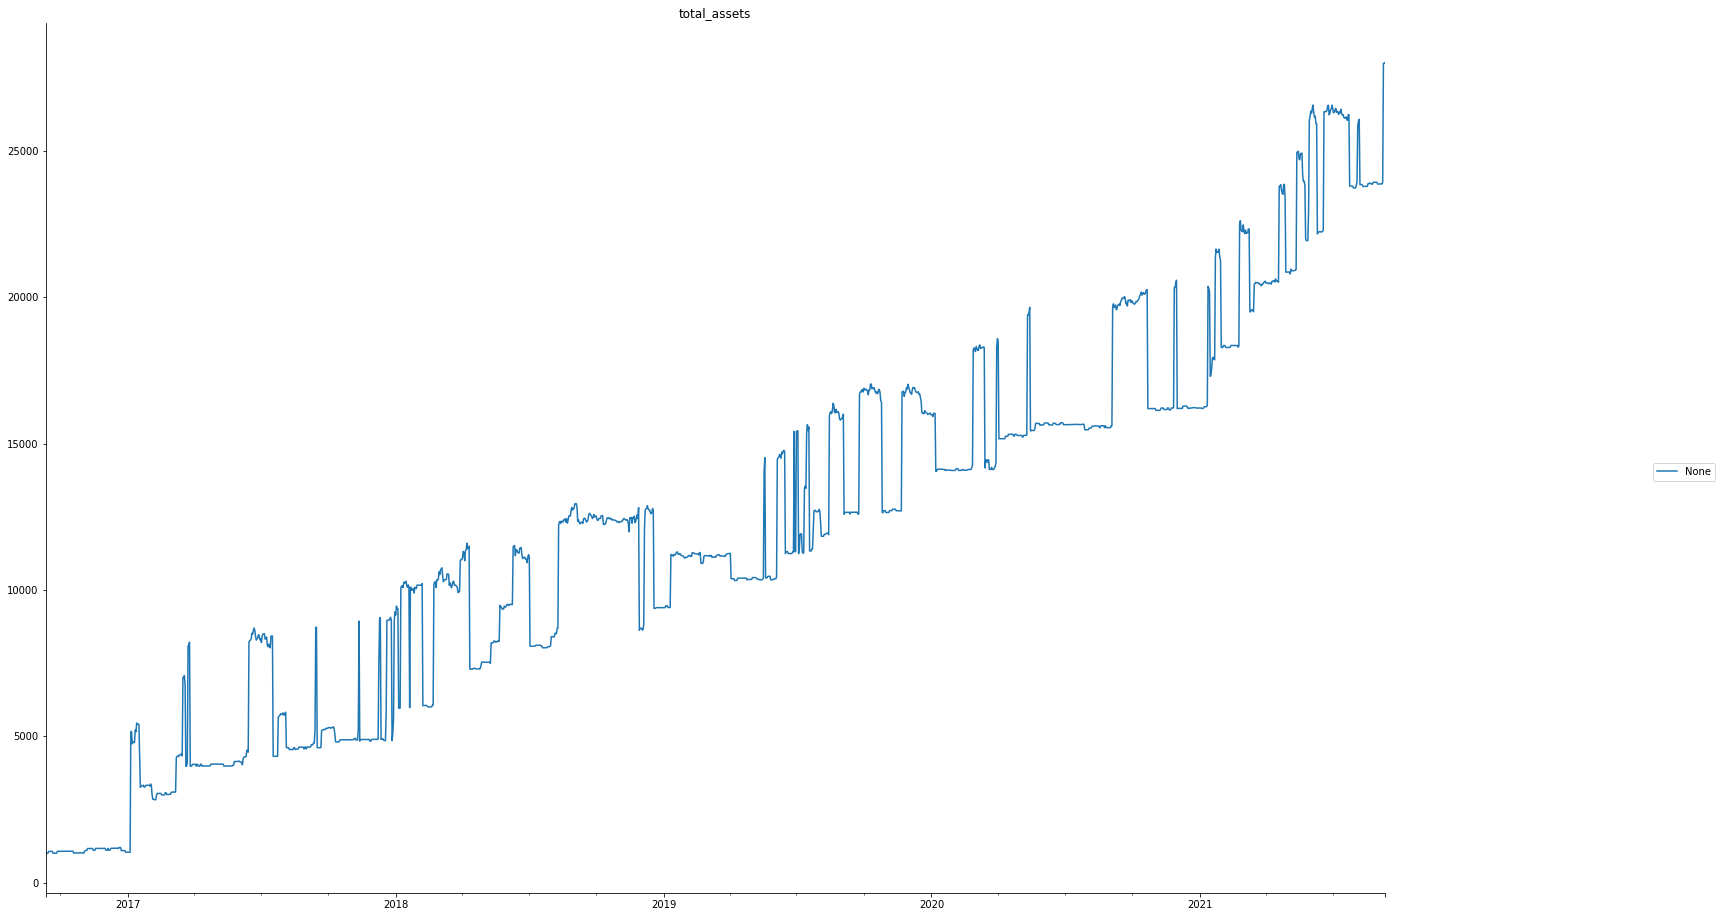

In [14]:
total_assets.plot(figsize=(24,16))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("total_assets")
sns.despine()

In [17]:
import Risk_Pre
import math
time = pd.date_range(start='2016-09-11', end='2021-09-10')
total_assets =pd.Series( np.zeros(len(time)),index=time)
for d in time:
    total_assets[d]=1000
tradable_time = pd.date_range(start='2016-09-11', end='2021-09-10',freq="B")
coin_increase = [2.145571904, 11.69336688, 89.56046243, 669.1824212, 5000]
coin_decrease = [12.11915554, 74.411615, 615.8954844, 5000]
gold_increase = [0.0266,0.67217, 18.346, 500]
gold_decrease = [0.335484009,3.388489141,41.32889913,500]
a = 0.0001
max_price = 500
C_coin = 500
C_gold = 500
M9_coin = 0.11
M9_gold = 0.008877127
M1_coin = 0.0854
M1_gold = 0.006773216
M5_coin = 0.0032
M5_gold = 0.0003
u_coin_increase = len(coin_increase)
u_coin_decrease = len(coin_decrease)
u_gold_increase = len(gold_increase)
u_gold_decrease = len(gold_decrease)
C = 1000
G = 0
B = 0
m_b = 0
n_b = 0
m_gold = 0
n_gold = 0
accumulate_rate_coin = 0
accumulate_rate_gold = 0
for d in range(4, len(time)):
    # predict increment
    # print(predict_sunspots_gold[time[d]])
    increment_rate = (coin["Value"][time[d]] - coin["Value"][time[d - 1]]) / coin["Value"][time[d - 1]]
    # coin
    if increment_rate < 0:
        n_b += 1
        if m_b > 0:
            accumulate_rate_coin = 0
            m_b = 0
        accumulate_rate_coin -= increment_rate
        x = accumulate_rate_coin / (M1_coin / u_coin_decrease)
        if x >= u_coin_increase:
            x = u_coin_increase
        money = 0.1111 * math.exp(2.1038 * x)#0.1314e2.062x
        if money >coin["Value"][time[d]]*B:
            B = money/coin["Value"][time[d]]
            C_coin -= money-coin["Value"][time[d]]*B
    elif increment_rate > 0:    # 减仓
        m_b += 1
        if n_b > 0:
            accumulate_rate_coin = 0
            n_b = 0
        accumulate_rate_coin += increment_rate
        x = accumulate_rate_coin / (M9_coin / u_coin_increase)
        if x >= u_coin_increase:
            x = u_coin_increase
        money = 0.0121 * math.exp(2.1259 * x)# 0.015e2.0836x
        # B*coin["Value"][time[d]] 当前拥有的比特币价值
        B = B * (1 - money / max_price)
        C_coin += B * (money / max_price) * coin["Value"][time[d]]
    if time[d] in tradable_time:
        # gold
        index = tradable_time.tolist().index(time[d])
        increment_rate_gold = (gold["USD (PM)"][tradable_time[index]] - gold["USD (PM)"][tradable_time[index-1]]) / gold["USD (PM)"][tradable_time[index-1]]
        if increment_rate_gold < 0:
            n_gold += 1
            if m_gold > 0:
                accumulate_rate_gold = 0
                m_gold = 0
            accumulate_rate_gold -= increment_rate_gold
            x = accumulate_rate_gold / (M1_gold / u_gold_decrease)
            if x >u_gold_decrease:
                x = u_gold_decrease
            money = 0.0217 * math.exp(1.9979 * x)# 0.0217e1.9979x
            if money > G*gold["USD (PM)"][time[d]]: # 未达到所需仓位
                G = money/gold["USD (PM)"][time[d]]
                C_gold -= money-G*gold["USD (PM)"][time[d]]
        elif increment_rate_gold > 0:   # 减仓
            m_gold += 1
            # 不连续了，将积累的清空
            if n_gold > 0:
                accumulate_rate_gold = 0
                n_gold = 0
            accumulate_rate_gold += increment_rate_gold
            x = accumulate_rate_gold / (M9_gold / u_gold_increase)
            if x >= u_gold_increase:
                x = u_gold_increase
            money = 0.023 * math.exp( 2.4971* x)
            # B*coin["Value"][time[d]] 当前拥有的比特币价值
            G = G * (1 - money / 500)
            C_gold += G * (money / 500) * gold["USD (PM)"][time[d]]
#         print("C_gold:{},byte:{},gold:{},money:{},increment_rate_gold:{},x:{},m_gold:{},n_gold:{}".format(C_gold, B, G,money, increment_rate_gold,x, m_gold, n_gold))
    total_assets[time[d]] = C_coin + C_gold + B * coin["Value"][time[d]] + G * gold["USD (PM)"][time[d]]
print("total asset : {}".format(C_coin + C_gold + B * coin["Value"][time[d]] + G * gold["USD (PM)"][time[d]])) 
print("gold_interests:{}".format( C_gold + G * gold["USD (PM)"][time[d]]-500))
print("coin_interests:{}".format( C_coin +B * coin["Value"][time[d]] -500))
# print(total_assets)

Using TensorFlow backend.
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tianzhaohaha/opt/anaconda3/envs/MCM/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1